# Ploting Avarage Spectra for Each Parasitemia Class


In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import find_peaks
from matplotlib import rcParams

In [2]:
data = pd.read_csv('No_Anemia_50HM_alldata.csv') # Load Each anemia separately, here is only for none anemic class
data

,Unnamed: 0,Cat4,Cat5,3855,3853,3851,3849,3847,3845,3843,...,545,543,541,539,537,535,533,531,529,527
0,40,50HM,0PRS,0.0127,0.0124,0.0123,0.0123,0.0124,0.0125,0.0125,...,0.1087,0.1071,0.1084,0.1086,0.1053,0.1020,0.1031,0.1072,0.1100,0.1098
1,41,50HM,0PRS,0.0127,0.0124,0.0124,0.0125,0.0127,0.0126,0.0125,...,0.1088,0.1055,0.1067,0.1086,0.1089,0.1094,0.1104,0.1116,0.1140,0.1172
2,42,50HM,0PRS,0.0131,0.0128,0.0128,0.0129,0.0130,0.0130,0.0129,...,0.1094,0.1066,0.1092,0.1131,0.1150,0.1152,0.1162,0.1208,0.1285,0.1344
3,43,50HM,0PRS,0.0139,0.0136,0.0135,0.0135,0.0136,0.0137,0.0138,...,0.1073,0.1072,0.1116,0.1160,0.1183,0.1203,0.1227,0.1234,0.1225,0.1209
4,44,50HM,0PRS,0.0141,0.0138,0.0137,0.0138,0.0139,0.0139,0.0138,...,0.1165,0.1179,0.1225,0.1276,0.1302,0.1278,0.1220,0.1173,0.1169,0.1201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647,4554,50HM,6PRS,0.0140,0.0137,0.0133,0.0131,0.0132,0.0133,0.0132,...,0.1343,0.1299,0.1277,0.1272,0.1269,0.1294,0.1341,0.1346,0.1312,0.1293
1648,4555,50HM,6PRS,0.0141,0.0136,0.0131,0.0130,0.0132,0.0134,0.0137,...,0.1381,0.1409,0.1408,0.1382,0.1345,0.1299,0.1258,0.1245,0.1246,0.1213
1649,4556,50HM,6PRS,0.0152,0.0154,0.0131,0.0117,0.0120,0.0128,0.0133,...,0.1471,0.1435,0.1380,0.1306,0.1243,0.1212,0.1195,0.1203,0.1244,0.1253
1650,4557,50HM,6PRS,0.0158,0.0158,0.0155,0.0153,0.0152,0.0154,0.0156,...,0.1264,0.1205,0.1186,0.1202,0.1229,0.1271,0.1345,0.1432,0.1476,0.1429


In [3]:
# Seperate the wavelengths and the parasitemia class and drop unwanted columns

dList=['Unnamed: 0','Cat4', 'Cat5']
descriptorsDF = data[dList]
data.drop(dList, axis=1,inplace=True)

In [4]:
# Get the wavenumbers
wnLabels = data.columns.values
wnLabels
waveNums = [int(x) for x in wnLabels]
waveNums
# # Get a list of colors you want to use for your class
colors = ['#66c2a5','#8da0cb','#fc8d62','blue','#e78ac3']

In [5]:
# get the class Parasitemia for the plot
y_labels = descriptorsDF['Cat5']
y_labels

0       0PRS
1       0PRS
2       0PRS
3       0PRS
4       0PRS
        ... 
1647    6PRS
1648    6PRS
1649    6PRS
1650    6PRS
1651    6PRS
Name: Cat5, Length: 1652, dtype: object

## Plotting the mean spectra for each Parasitemia at None Ameic (50HMT)

This is a automated way of plotting. It does not matter how many classes you have, it will plot the mean of all of them

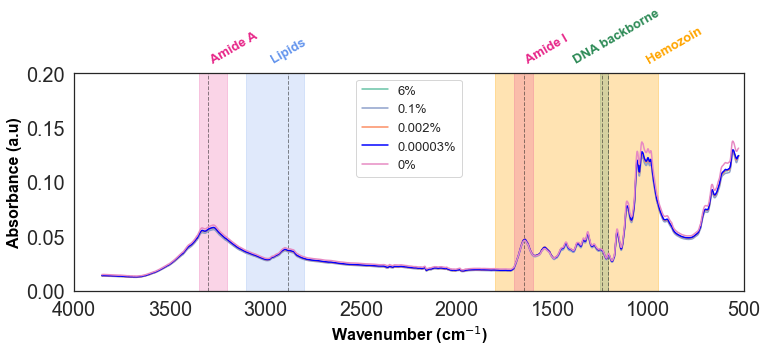

In [7]:
sns.set(context="notebook",
        palette='deep',
        #saturation=2,
        #width=0.75,
        #dodge=True,
        style="white",
        font_scale=1.8,
        rc={"font.family": "sans-serif"})

rcParams['font.sans-serif'] = 'Arial'

fig, ax = plt.subplots(figsize=(12,4))


ax.axvline(3300, ls='--', color='k', linewidth=1, alpha=0.5)
#ax.axvline(1215, ls='--', color='k', linewidth=1, alpha=0.5)
ax.axvline(2880, ls='--', color='k', linewidth=1, alpha=0.5)
ax.axvline(1650, ls='--', color='k', linewidth=1, alpha=0.5)
ax.axvline(1209, ls='--', color='k', linewidth=1, alpha=0.5)
ax.axvline(1241, ls='--', color='k', linewidth=1, alpha=0.5)

plt.fill_between((3350,3200), 0, 4, alpha = 0.2, color='#e7298a')
plt.fill_between((3100,2800), 0, 4, alpha = 0.2, color='cornflowerblue')
plt.fill_between((1800,950), 0, 4, alpha = 0.3, color='orange')
plt.fill_between((1700,1600), 0, 4, alpha = 0.2, color='#e7298a')
plt.fill_between((1250,1210), 0, 4, alpha = 0.2, color='seagreen')

fig.text(3298,0.21, 'Amide A', transform=ax.transData, color='#e7298a', fontweight='bold', rotation=30,fontsize=13)
fig.text(2980,0.21, 'Lipids', transform=ax.transData, color='cornflowerblue', fontweight='bold', rotation=30,fontsize=13)
fig.text(1020,0.21, 'Hemozoin', transform=ax.transData, color='orange', fontweight='bold', rotation=30,fontsize=13)
fig.text(1650,0.21, 'Amide I', transform=ax.transData, color='#e7298a', fontweight='bold', rotation=30,fontsize=13)
fig.text(1400,0.21, 'DNA backborne', transform=ax.transData, color='seagreen', fontweight='bold', rotation=30,fontsize=13)

for i, c in zip(np.unique(y_labels), colors):
    sns.lineplot(x=waveNums, y=np.mean(data[y_labels == i], axis=0), label=i, color=c)
    
plt.legend(loc=9, prop={'size': 10})

# Create the legend
legend = plt.legend(loc=9, prop={'size': 13})

modified_labels = ['6%', '0.1%', '0.002%', '0.00003%', '0%'] # Modify specific legend labels

for text, modified_label in zip(legend.get_texts(), modified_labels):
    text.set_text(modified_label)
    
ax.set_xlim(4000,500)
ax.set_ylim(0,.2)
#ax.set_title("50 HMT",fontsize=16)
ax.set_xlabel("Wavenumber (cm$^{-1}$)",fontsize=16, weight="bold",color='black')
ax.set_ylabel("Absorbance (a.u)",fontsize=16, weight="bold",color='black')
plt.show()

## Plotting all the spectra for each class

In [8]:
# Extract the unique labels for each parasitemia
y_unique_labels = y_labels.unique().tolist()
y_unique_labels.sort(reverse=True)
y_unique_labels

['6PRS', '0PRS', '0.1PRS', '0.002PRS', '0.00003PRS']

Text(0, 0.5, 'Absorbance (a.u)')

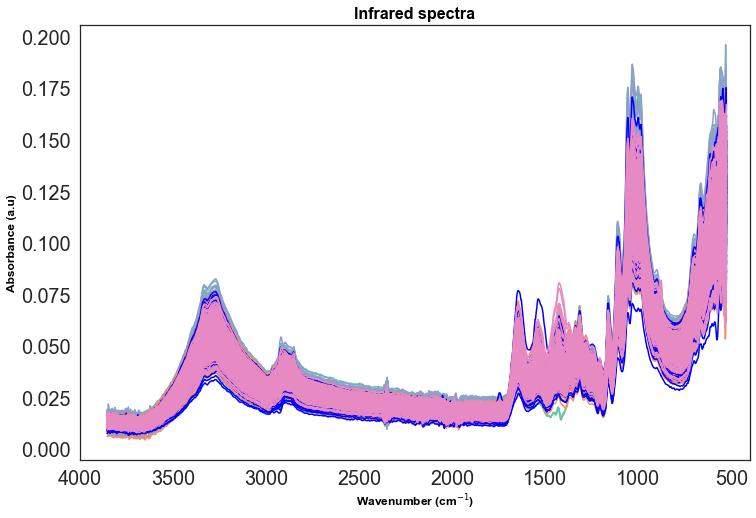

In [9]:
fig, ax = plt.subplots(figsize=(12,8))

# Iterates through each row and compare to the label, and plot it. 
for i, c in zip(y_unique_labels, colors):
    for row in data.loc[y_labels == i].itertuples(index=False):
        ax.plot(waveNums, row, color=c, label=i)

# Create Legend

handles, labels_2 = ax.get_legend_handles_labels()
newLabels, newHandles = [], []
for handle, label_1 in zip(handles, labels_2):
    if label_1 not in newLabels:
        newLabels.append(label_1)
        newHandles.append(handle)
        
ax.set_xlim(4000,401)
ax.set_title("Infrared spectra",fontsize=16,weight="bold",color='black' )
ax.set_xlabel("Wavenumber (cm$^{-1}$)",fontsize=12, weight="bold",color='black')
ax.set_ylabel("Absorbance (a.u)",fontsize=12, weight="bold",color='black')

## Creating A zooming figure of only one hematocrit ratio with separation of parasitemia

In [10]:
data = pd.read_csv('No_Anemia_50HM_alldata.csv')

descriptors = ['Unnamed: 0','Cat4', 'Cat5']
descriptors_data = data['Cat5']
measurements = data.drop(descriptors, axis=1)
measuremts_3855527 = data.loc[:,'3855':'527']
measuremts_3855527

,3855,3853,3851,3849,3847,3845,3843,3841,3839,3837,...,545,543,541,539,537,535,533,531,529,527
0,0.0127,0.0124,0.0123,0.0123,0.0124,0.0125,0.0125,0.0125,0.0125,0.0125,...,0.1087,0.1071,0.1084,0.1086,0.1053,0.1020,0.1031,0.1072,0.1100,0.1098
1,0.0127,0.0124,0.0124,0.0125,0.0127,0.0126,0.0125,0.0124,0.0124,0.0125,...,0.1088,0.1055,0.1067,0.1086,0.1089,0.1094,0.1104,0.1116,0.1140,0.1172
2,0.0131,0.0128,0.0128,0.0129,0.0130,0.0130,0.0129,0.0129,0.0129,0.0130,...,0.1094,0.1066,0.1092,0.1131,0.1150,0.1152,0.1162,0.1208,0.1285,0.1344
3,0.0139,0.0136,0.0135,0.0135,0.0136,0.0137,0.0138,0.0138,0.0139,0.0140,...,0.1073,0.1072,0.1116,0.1160,0.1183,0.1203,0.1227,0.1234,0.1225,0.1209
4,0.0141,0.0138,0.0137,0.0138,0.0139,0.0139,0.0138,0.0137,0.0137,0.0138,...,0.1165,0.1179,0.1225,0.1276,0.1302,0.1278,0.1220,0.1173,0.1169,0.1201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647,0.0140,0.0137,0.0133,0.0131,0.0132,0.0133,0.0132,0.0133,0.0132,0.0129,...,0.1343,0.1299,0.1277,0.1272,0.1269,0.1294,0.1341,0.1346,0.1312,0.1293
1648,0.0141,0.0136,0.0131,0.0130,0.0132,0.0134,0.0137,0.0140,0.0140,0.0136,...,0.1381,0.1409,0.1408,0.1382,0.1345,0.1299,0.1258,0.1245,0.1246,0.1213
1649,0.0152,0.0154,0.0131,0.0117,0.0120,0.0128,0.0133,0.0138,0.0140,0.0133,...,0.1471,0.1435,0.1380,0.1306,0.1243,0.1212,0.1195,0.1203,0.1244,0.1253
1650,0.0158,0.0158,0.0155,0.0153,0.0152,0.0154,0.0156,0.0160,0.0160,0.0157,...,0.1264,0.1205,0.1186,0.1202,0.1229,0.1271,0.1345,0.1432,0.1476,0.1429


In [11]:
# Extract data for each parasitemia class
head_spectra = measuremts_3855527.loc[data['Cat5'] == '6PRS']
thorax_spectra = measuremts_3855527.loc[data['Cat5'] == '0.1PRS']
abdomen_spectra = measuremts_3855527.loc[data['Cat5'] == '0.002PRS']
legs_spectra = measuremts_3855527.loc[data['Cat5'] == '0.00003PRS']
Control_spectra = measuremts_3855527.loc[data['Cat5'] == '0PRS']

In [12]:
wavelabels = measuremts_3855527.columns.values.tolist()
wavenumbers = [int(x) for x in wavelabels ]

Text(1400, 0.26, 'DNA backborne')

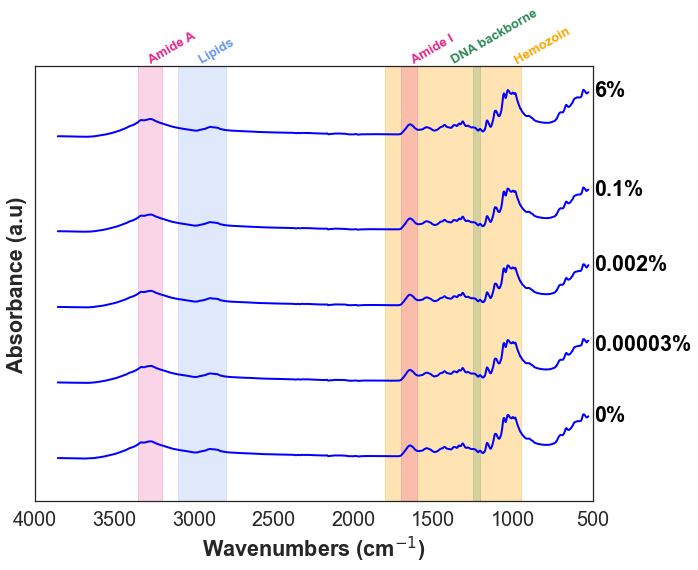

In [37]:
ax.plot(wavenumbers, head_spectra.mean(axis=0)+0.05, label='6PRS', color='blue')
ax.plot(wavenumbers, thorax_spectra.mean(axis=0)-0.2, label='0.1PRS', color='blue')
ax.plot(wavenumbers, abdomen_spectra.mean(axis=0)-0.4, label='0.002PRS', color='blue')
ax.plot(wavenumbers, legs_spectra.mean(axis=0)-0.6, label='0.00003PRS',color='blue')
ax.plot(wavenumbers, Control_spectra.mean(axis=0)-0.8, label='0PRS',color='blue')
ax.set_yticklabels([])


ax.set_xlim(4000,500)
ax.set_ylim(-0.9,0.25)
ax.set_ylabel("Absorbance (a.u)", fontweight='bold')
ax.set_xlabel('Wavenumbers (cm$^{-1}$)', fontweight='bold')


fig.text(490,0.17, '6%', transform=ax.transData, color='black', fontweight='bold')
fig.text(490,-0.09, '0.1%',transform=ax.transData,color='black',fontweight='bold')
fig.text(490,-0.29, '0.002%',transform=ax.transData,color='black',fontweight='bold')
fig.text(490,-0.5, '0.00003%',transform=ax.transData,color='black',fontweight='bold')
fig.text(490,-0.69, '0%',transform=ax.transData,color='black',fontweight='bold')

aplha_value=0.15

#shadows
plt.fill_between((3350,3200), -0.9, 0.6, alpha = 0.2, color='#e7298a')
plt.fill_between((3100,2800), -0.9, 0.6, alpha = 0.2, color='cornflowerblue')
plt.fill_between((1800,950), -0.9, 0.6, alpha = 0.3, color='orange')
plt.fill_between((1700,1600), -0.9, 0.6, alpha = 0.2, color='#e7298a')
plt.fill_between((1250,1210), -0.9, 0.6, alpha = 0.2, color='seagreen')

fig.text(3300,0.26, 'Amide A', transform=ax.transData, color='#e7298a', fontweight='bold', rotation=30,fontsize=13)
fig.text(2980,0.26, 'Lipids', transform=ax.transData, color='cornflowerblue', fontweight='bold', rotation=30,fontsize=13)
fig.text(1000,0.26, 'Hemozoin', transform=ax.transData, color='orange', fontweight='bold', rotation=30,fontsize=13)
fig.text(1650,0.26, 'Amide I', transform=ax.transData, color='#e7298a', fontweight='bold', rotation=30,fontsize=13)
fig.text(1400,0.26, 'DNA backborne', transform=ax.transData, color='seagreen', fontweight='bold', rotation=30,fontsize=13)